In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-pizza-price/Pizza-Price.csv


In [2]:
# Importing Liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the Data
df = pd.read_csv('/kaggle/input/predict-pizza-price/Pizza-Price.csv')
df

,Restaurant,Extra Cheeze,Extra Mushroom,Size by Inch,Extra Spicy,Price
0,A,yes,yes,12,no,650
1,B,no,yes,15,yes,800
2,C,no,no,9,no,500
3,D,yes,no,12,yes,700
4,E,yes,no,12,yes,750
5,F,no,yes,15,yes,900
6,G,yes,no,9,no,600
7,H,yes,no,9,yes,700
8,I,no,yes,15,no,750
9,J,no,yes,15,no,700


In [4]:
corr = df.corr()
corr.style.background_gradient(cmap='Reds')

,Size by Inch,Price
Size by Inch,1.000000,0.681904
Price,0.681904,1.000000


In [5]:
# Getting data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Restaurant      20 non-null     object
 1   Extra Cheeze    20 non-null     object
 2   Extra Mushroom  20 non-null     object
 3    Size by Inch   20 non-null     int64 
 4   Extra Spicy     20 non-null     object
 5   Price           20 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 1.1+ KB


In [6]:
# Checking Null values
df.isnull().sum()

Restaurant        0
Extra Cheeze      0
Extra Mushroom    0
 Size by Inch     0
Extra Spicy       0
Price             0
dtype: int64

In [7]:
# Describing the data
pd.set_option('precision',3)
df.describe()

,Size by Inch,Price
count,20.000,20.000
mean,11.600,727.500
std,2.501,130.258
min,8.000,500.000
25%,9.000,650.000
50%,12.000,700.000
75%,12.750,762.500
max,15.000,1000.000


In [8]:
# shape of data
df.shape

(20, 6)

# Data Visualization

yes    12
no      8
Name: Extra Cheeze, dtype: int64


<AxesSubplot:ylabel='Extra Cheeze'>

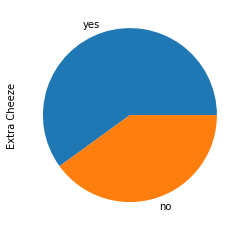

In [9]:
# Pizza which have Extra Cheeze
print(df['Extra Cheeze'].value_counts())
df['Extra Cheeze'].value_counts().plot.pie()

yes    11
no      9
Name: Extra Mushroom, dtype: int64


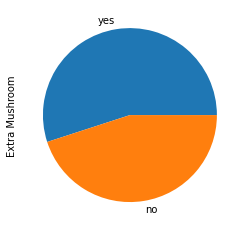

In [10]:
# Pizza which have Extra Mushroom
print(df['Extra Mushroom'].value_counts())
df['Extra Mushroom'].value_counts().plot.pie();

no     11
yes     9
Name: Extra Spicy, dtype: int64


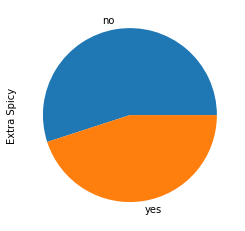

In [11]:
# Pizza which are Extra Spicy
print(df['Extra Spicy'].value_counts())
df['Extra Spicy'].value_counts().plot.pie();

12    8
9     5
15    5
8     2
Name:  Size by Inch, dtype: int64


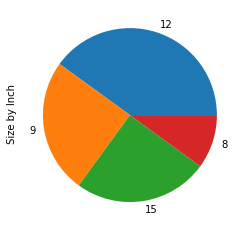

In [12]:
# Pizza Size by Inch mostly ordered
print(df[' Size by Inch'].value_counts())
df[' Size by Inch'].value_counts().plot.pie();

700     6
750     3
900     2
650     2
600     2
800     1
550     1
1000    1
500     1
950     1
Name: Price, dtype: int64
Total money spent by customer:  14550


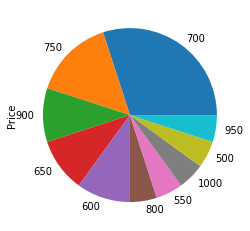

In [13]:
# Money spent by customers
print(df['Price'].value_counts())
df['Price'].value_counts().plot.pie();
print('Total money spent by customer: ', df['Price'].sum())

 Size by Inch  8   9   12  15
Price                        
500             0   1   0   0
550             1   0   0   0
600             1   1   0   0
650             0   1   1   0
700             0   2   3   1
750             0   0   2   1
800             0   0   0   1
900             0   0   1   1
950             0   0   1   0
1000            0   0   0   1


Size by Inch,8,9,12,15
Size by Inch,,,,
8,1.000,0.000,-0.408,-0.500
9,0.000,1.000,0.456,-0.149
12,-0.408,0.456,1.000,0.408
15,-0.500,-0.149,0.408,1.000


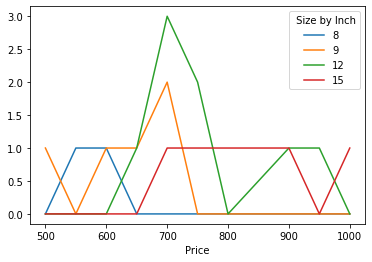

In [14]:
sizeprice = pd.crosstab(index = df['Price'], columns = df[' Size by Inch'])
print(sizeprice)
sizeprice.plot.line();
corr = sizeprice.corr()
corr.style.background_gradient(cmap='Blues')

Extra Cheeze  no  yes
Price                
500            1    0
550            0    1
600            0    2
650            1    1
700            2    4
750            1    2
800            1    0
900            1    1
950            0    1
1000           1    0


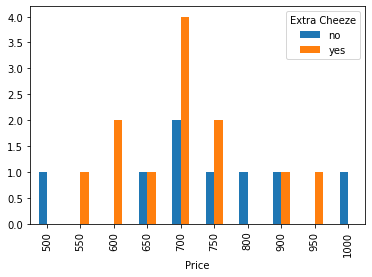

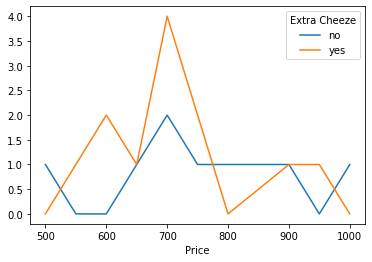

In [15]:
# CHEEZE - PRIZE
cheezeprice = pd.crosstab(index = df['Price'], columns = df['Extra Cheeze'])
print(cheezeprice)
cheezeprice.plot.bar();
cheezeprice.plot.line();

Extra Mushroom  no  yes
Price                  
500              1    0
550              0    1
600              1    1
650              1    1
700              5    1
750              1    2
800              0    1
900              0    2
950              0    1
1000             0    1


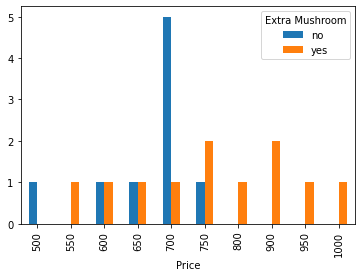

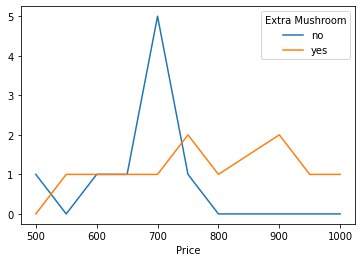

In [16]:
# MUSHROOM - PRIZE
mushprice = pd.crosstab(index = df['Price'], columns = df['Extra Mushroom'])
print(mushprice)
mushprice.plot.bar();
mushprice.plot.line();

Extra Spicy  no  yes
Price               
500           1    0
550           1    0
600           2    0
650           2    0
700           3    3
750           2    1
800           0    1
900           0    2
950           0    1
1000          0    1


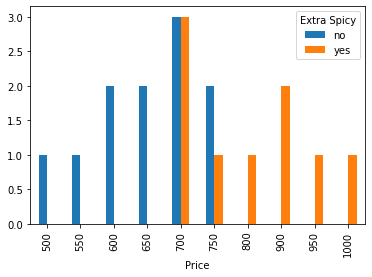

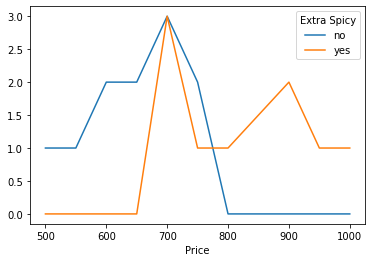

In [17]:
# SPICY - PRIZE
spiceprice = pd.crosstab(index = df['Price'], columns = df['Extra Spicy'])
print(spiceprice)
spiceprice.plot.bar();
spiceprice.plot.line();

# Spliting data into Test and Training Data

In [18]:
# Replacing YES/NO to 0/1 in data
df.replace(('yes', 'no'), (1, 0), inplace=True)
df

,Restaurant,Extra Cheeze,Extra Mushroom,Size by Inch,Extra Spicy,Price
0,A,1,1,12,0,650
1,B,0,1,15,1,800
2,C,0,0,9,0,500
3,D,1,0,12,1,700
4,E,1,0,12,1,750
5,F,0,1,15,1,900
6,G,1,0,9,0,600
7,H,1,0,9,1,700
8,I,0,1,15,0,750
9,J,0,1,15,0,700


In [19]:
corr = df.corr()
corr.style.background_gradient(cmap='Greens')

,Extra Cheeze,Extra Mushroom,Size by Inch,Extra Spicy,Price
Extra Cheeze,1.000,-0.123,-0.511,-0.082,-0.145
Extra Mushroom,-0.123,1.000,0.470,0.010,0.433
Size by Inch,-0.511,0.470,1.000,0.396,0.682
Extra Spicy,-0.082,0.010,0.396,1.000,0.675
Price,-0.145,0.433,0.682,0.675,1.000


In [20]:
# Getting Features
features = ['Extra Cheeze', 'Extra Mushroom', 'Extra Spicy', ' Size by Inch']
x = df[features]

# Predicting Value
y = df['Price']

In [21]:
# import important liberaries
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/4, random_state = 4)


*** Logistic Regression ***

In [22]:
#Import Library for Accuracy Score
from sklearn.metrics import accuracy_score

#Import Library for Logistic Regression
from sklearn.linear_model import LogisticRegression

#Initialize the Logistic Regression Classifier
logisreg = LogisticRegression()

#Train the model using Training Dataset
logisreg.fit(x_train, y_train)

# Prediction using test data
y_pred = logisreg.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_logisreg = accuracy_score(y_test, y_pred)
print( 'Accuracy of Logistic Regression model : ', acc_logisreg )


Accuracy of Logistic Regression model :  0.4


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


*** Linear Discriminent Analysis ***

In [23]:
#Import Library for Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score


#Initialize the Linear Discriminant Analysis Classifier
lda = LinearDiscriminantAnalysis()

#Train the model using Training Dataset
lda.fit(x_train, y_train)

# Prediction using test data
lda_pred = lda.predict(x_test)

# Calculate Model accuracy by comparing y_test and lda_pred
acc_lda = accuracy_score(y_test, lda_pred)
print( 'Accuracy of Linear Discriminant Analysis Classifier: ', acc_lda )


Accuracy of Linear Discriminant Analysis Classifier:  0.2


*** Gaussian Naive Bayes ***

In [24]:
#Import Library for Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Initialize the Gaussian Naive Bayes Classifier
gnb = GaussianNB()

#Train the model using Training Dataset
gnb.fit(x_train, y_train)

# Prediction using test data
gnb_pred = gnb.predict(x_test)

# Calculate Model accuracy by comparing y_test and gnb_pred
acc_ganb = accuracy_score(y_test, gnb_pred)
print( 'Accuracy of Gaussian Naive Bayes : ', acc_ganb )


Accuracy of Gaussian Naive Bayes :  0.2


*** Decision Tree Classifier ***

In [25]:
#Import Library for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier()

#Train the model using Training Dataset
dtc.fit(x_train, y_train)

# Prediction using test data
dtc_pred = dtc.predict(x_test)

# Calculate Model accuracy by comparing y_test and dtc_pred
acc_dtree = accuracy_score(y_test, dtc_pred)
print( 'Accuracy of  Decision Tree Classifier : ', acc_dtree )


Accuracy of  Decision Tree Classifier :  0.2


*** Random Forest Classifier ***

In [26]:
#Import Library for Random Forest
from sklearn.ensemble import RandomForestClassifier

#Initialize the Random Forest
rfc = RandomForestClassifier()

#Train the model using Training Dataset
rfc.fit(x_train, y_train)

# Prediction using test data
rfc_pred = rfc.predict(x_test)

# Calculate Model accuracy by comparing y_test and rfc_pred
acc_rf = accuracy_score(y_test, rfc_pred)
print( 'Accuracy of  Random Forest : ', acc_rf )


Accuracy of  Random Forest :  0.2


*** Support Vector Machine SVM ***

In [27]:
#Import Library for Support Vector Machine
from sklearn import svm

#Initialize the Support Vector Classifier
svmodel = svm.SVC()

#Train the model using Training Dataset
svmodel.fit(x_train, y_train)

# Prediction using test data
svm_pred = svmodel.predict(x_test)

# Calculate Model accuracy by comparing y_test and svm_pred
acc_svc = accuracy_score(y_test, svm_pred)
print( 'Accuracy of Support Vector Classifier: ', acc_svc )


Accuracy of Support Vector Classifier:  0.4


*** K Nearest Neighbour Classifier ***

In [28]:
#Import Library for K Nearest Neighbour Model
from sklearn.neighbors import KNeighborsClassifier

#Initialize the K Nearest Neighbour Model with Default Value of K=5
knnmodel = KNeighborsClassifier()

#Train the model using Training Dataset
knnmodel.fit(x_train, y_train)

# Prediction using test data
knn_pred = knnmodel.predict(x_test)

# Calculate Model accuracy by comparing y_test and knn_pred
acc_knn = accuracy_score(y_test, knn_pred)
print( 'Accuracy of KNN Classifier: ', acc_knn )


Accuracy of KNN Classifier:  0.2


# Model Selection

In [29]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Score': [acc_logisreg, acc_lda, acc_ganb, acc_dtree, acc_rf, acc_svc, acc_knn]})

models.sort_values(by='Score', ascending=False)


,Model,Score
0,Logistic Regression,0.4
5,Support Vector Machines,0.4
1,Linear Discriminant Analysis,0.2
2,Naive Bayes,0.2
3,Decision Tree,0.2
4,Random Forest,0.2
6,K - Nearest Neighbors,0.2


In [30]:
# Predictions through THe upstaed MOdels
print('Price Predictions using Logistic Regression Model: ', logisreg.predict([[1,0,1,11]]))

print('Price Predictions using LDA Model: ', lda.predict([[1,0,1,11]]))

print('Price Predictions using Gaussian Naive Bayes Model: ', gnb.predict([[1,0,1,11]]))

print('Price Predictions using Decision Tree Model: ', dtc.predict([[1,0,1,11]]))

print('Price Predictions using Random Forest Model: ', rfc.predict([[1,0,1,11]]))

print('Price Predictions using SVM Model: ', svmodel.predict([[1,0,1,11]]))

print('Price Predictions using KNN Model: ', knnmodel.predict([[1,0,1,11]]))

Price Predictions using Logistic Regression Model:  [700]
Price Predictions using LDA Model:  [700]
Price Predictions using Gaussian Naive Bayes Model:  [700]
Price Predictions using Decision Tree Model:  [750]
Price Predictions using Random Forest Model:  [750]
Price Predictions using SVM Model:  [700]
Price Predictions using KNN Model:  [700]
